In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter

In [2]:
#Setting options
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", "{:,.2f}".format)

In [3]:
df = pd.read_csv(r"E:\Portfolio\Project\1_Cleaning And Transformation\Pak Ecommerce Cleaned Dataset.csv", low_memory = False)
df

,item_id,order_status,created_at,product_id,price,quantity,total_price,increment_id,category,sales_commission_code,discount,payment_method,working_date,bi_status,MV,year,month,customer_since,month_year,financial_year,customer_id
0,"211,131.00",complete,2016-07-01,kreations_YI 06-L,"1,950.00",1.00,"1,950.00",100147443,Women's Fashion,\N,0.00,cod,7/1/2016,#REF!,"1,950","2,016.00",7.00,2016-07-01,2016-07-01,FY17,1.00
1,"211,133.00",canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.00,1.00,240.00,100147444,Beauty & Grooming,\N,0.00,cod,7/1/2016,Gross,240,"2,016.00",7.00,2016-07-01,2016-07-01,FY17,2.00
2,"211,134.00",canceled,2016-07-01,Ego_UP0017-999-MR0,"2,450.00",1.00,"2,450.00",100147445,Women's Fashion,\N,0.00,cod,7/1/2016,Gross,"2,450","2,016.00",7.00,2016-07-01,2016-07-01,FY17,3.00
3,"211,135.00",complete,2016-07-01,kcc_krone deal,360.00,1.00,60.00,100147446,Beauty & Grooming,R-FSD-52352,300.00,cod,7/1/2016,Net,360,"2,016.00",7.00,2016-07-01,2016-07-01,FY17,4.00
4,"211,136.00",refund,2016-07-01,BK7010400AG,555.00,2.00,"1,110.00",100147447,Soghaat,\N,0.00,cod,7/1/2016,Valid,"1,110","2,016.00",7.00,2016-07-01,2016-07-01,FY17,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,"905,204.00",pending,2018-08-28,WOFSCE5AE00357AECDE,699.00,1.00,849.00,100562385,Women's Fashion,\N,0.00,cod,8/28/2018,Valid,699,"2,018.00",8.00,2018-08-01,2018-08-01,FY19,"115,320.00"
584520,"905,205.00",pending,2018-08-28,MATHUA5AF70A7D1E50A,"35,599.00",1.00,"35,899.00",100562386,Mobiles & Tablets,\N,0.00,bankalfalah,8/28/2018,Gross,"35,599","2,018.00",8.00,2018-08-01,2018-08-01,FY19,"115,326.00"
584521,"905,206.00",pending,2018-08-28,MATSAM5B6D7208C6D30,"129,999.00",2.00,"652,178.00",100562387,Mobiles & Tablets,\N,0.00,bankalfalah,8/28/2018,Gross,"259,998","2,018.00",8.00,2018-07-01,2018-08-01,FY19,"113,474.00"
584522,"905,207.00",pending,2018-08-28,MATSAM5B1509B4696EA,"87,300.00",2.00,"652,178.00",100562387,Mobiles & Tablets,\N,0.00,bankalfalah,8/28/2018,Gross,"174,600","2,018.00",8.00,2018-07-01,2018-08-01,FY19,"113,474.00"


In [4]:
# # Clean category and order_status columns
# df['category'] = df['category'].astype(str).str.strip()
# df['order_status'] = df['order_status'].astype(str).str.strip().str.lower()


In [5]:
df['category'].value_counts()

category
Mobiles & Tablets     115874
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Others                 37068
Soghaat                34011
Home & Living          26504
Entertainment          26326
Health & Sports        17502
Kids & Baby            16494
Computing              15933
School & Education      3478
Books                   1870
Name: count, dtype: int64

In [6]:
print(df['order_status'].unique())


['complete' 'canceled' 'refund' 'pending']


In [7]:
# Group by category
summary = df.groupby('category').agg(
    total_orders=('increment_id', 'count'),
    completed_orders=('order_status', lambda x: (x == 'complete').sum()),
    cancelled_orders=('order_status', lambda x: (x == 'canceled').sum()),
    total_revenue=('total_price', 'sum')
)
# Calculate metrics
summary['cancel_rate'] = summary['cancelled_orders'] / summary['total_orders'] * 100
summary['AOV'] = summary['total_revenue'] / summary['completed_orders']

summary = summary.sort_values('cancel_rate', ascending=False).reset_index()
summary.head(15)

,category,total_orders,completed_orders,cancelled_orders,total_revenue,cancel_rate,AOV
0,Others,37068,12612,21538,"228,294,963.25",58.10,"18,101.41"
1,Entertainment,26326,11467,12588,"539,047,961.03",47.82,"47,008.63"
2,Mobiles & Tablets,115874,50077,53892,"2,441,073,657.32",46.51,"48,746.40"
3,Computing,15933,7175,6828,"202,545,691.74",42.85,"28,229.36"
4,Appliances,52413,25339,21720,"656,849,685.76",41.44,"25,922.48"
5,Superstore,43613,27013,13936,"112,130,876.72",31.95,"4,151.00"
6,Home & Living,26504,15832,7215,"88,217,075.82",27.22,"5,572.07"
7,Women's Fashion,59721,33867,16082,"282,577,916.46",26.93,"8,343.75"
8,Kids & Baby,16494,10071,4086,"47,237,430.67",24.77,"4,690.44"
9,Men's Fashion,92221,52588,22089,"194,139,018.70",23.95,"3,691.70"


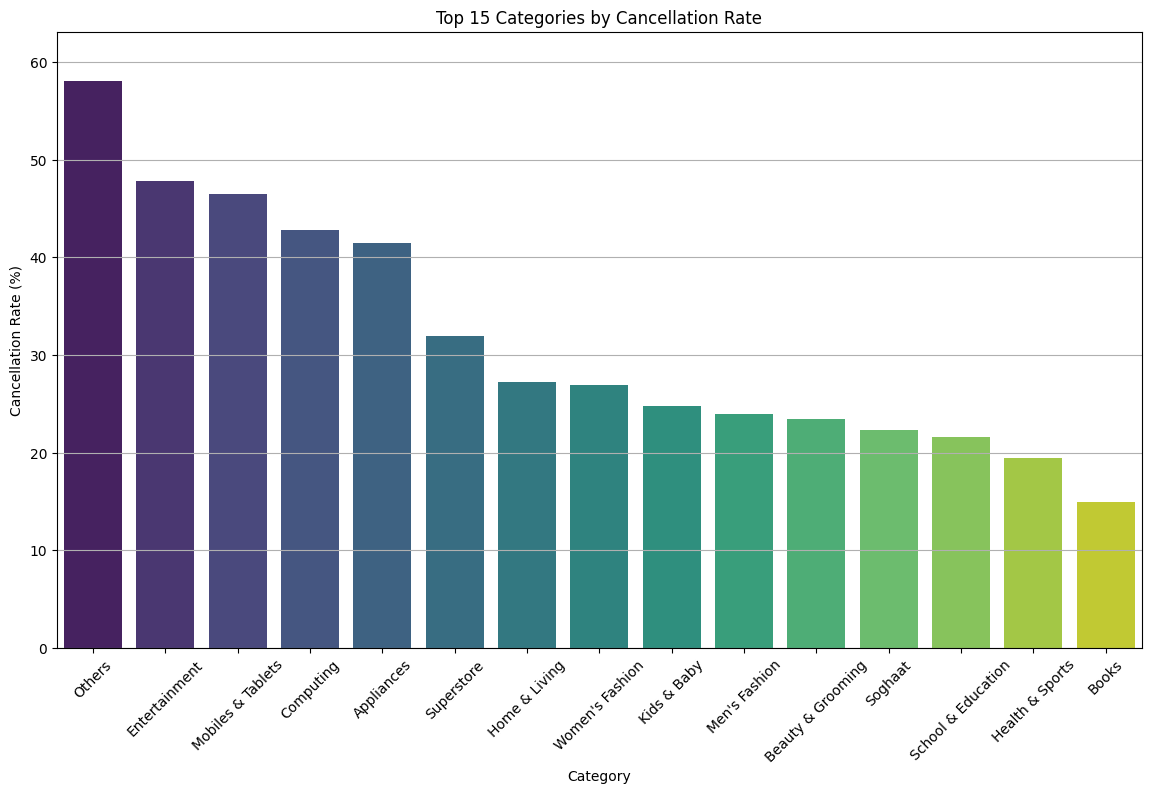

In [8]:
#plotting summary
plt.figure(figsize=(14, 8))
sns.barplot(data=summary.head(15), y='cancel_rate', x='category', palette='viridis')
plt.title('Top 15 Categories by Cancellation Rate')
plt.xticks(rotation=45)
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Category')
plt.ylim(0, summary['cancel_rate'].max() + 5)
plt.grid(axis='y')
plt.show()

In [9]:
# Group by category
summary = df.groupby('category').agg(
    total_orders=('increment_id', 'count'),
    completed_orders=('order_status', lambda x: (x == 'complete').sum()),
    cancelled_orders=('order_status', lambda x: (x == 'canceled').sum()),
    total_revenue=('total_price', 'sum')
)

# Calculate metrics
summary['cancel_rate'] = summary['cancelled_orders'] / summary['total_orders'] * 100
summary['AOV'] = summary['total_revenue'] / summary['completed_orders']
summary = summary.round(2)
summary = summary.sort_values('cancel_rate', ascending=False).reset_index()
summary.head(15)

,category,total_orders,completed_orders,cancelled_orders,total_revenue,cancel_rate,AOV
0,Others,37068,12612,21538,"228,294,963.25",58.10,"18,101.41"
1,Entertainment,26326,11467,12588,"539,047,961.03",47.82,"47,008.63"
2,Mobiles & Tablets,115874,50077,53892,"2,441,073,657.32",46.51,"48,746.40"
3,Computing,15933,7175,6828,"202,545,691.74",42.85,"28,229.36"
4,Appliances,52413,25339,21720,"656,849,685.76",41.44,"25,922.48"
5,Superstore,43613,27013,13936,"112,130,876.72",31.95,"4,151.00"
6,Home & Living,26504,15832,7215,"88,217,075.82",27.22,"5,572.07"
7,Women's Fashion,59721,33867,16082,"282,577,916.46",26.93,"8,343.75"
8,Kids & Baby,16494,10071,4086,"47,237,430.68",24.77,"4,690.44"
9,Men's Fashion,92221,52588,22089,"194,139,018.70",23.95,"3,691.70"


In [10]:
# Group by category and order status
summary = df.groupby(['category', 'order_status']).agg(
    total_orders=('increment_id', 'count'),
    completed_orders=('order_status', lambda x: (x == 'complete').sum()),
    cancelled_orders=('order_status', lambda x: (x == 'canceled').sum()),
    total_revenue=('total_price', 'sum')
)

# Calculate metrics
summary['cancel_rate'] = summary['cancelled_orders'] / summary['total_orders'] * 100
summary = summary.round(2)
summary = summary.sort_values('cancel_rate', ascending=False).reset_index()
summary

,category,order_status,total_orders,completed_orders,cancelled_orders,total_revenue,cancel_rate
0,Appliances,canceled,21720,0,21720,"359,042,159.89",100.00
1,Beauty & Grooming,canceled,9743,0,9743,"38,266,213.89",100.00
2,Books,canceled,280,0,280,"675,133.26",100.00
3,Computing,canceled,6828,0,6828,"131,524,770.07",100.00
4,Health & Sports,canceled,3397,0,3397,"14,186,780.42",100.00
5,Home & Living,canceled,7215,0,7215,"35,850,157.91",100.00
6,Entertainment,canceled,12588,0,12588,"302,741,612.97",100.00
7,Superstore,canceled,13936,0,13936,"45,716,096.61",100.00
8,Mobiles & Tablets,canceled,53892,0,53892,"1,623,211,595.56",100.00
9,Others,canceled,21538,0,21538,"140,480,345.40",100.00


In [11]:
# Group by category with additional metrics
summary = df.groupby('category').agg(
    total_orders=('increment_id', 'count'),
    completed_orders=('order_status', lambda x: (x == 'complete').sum()),
    cancelled_orders=('order_status', lambda x: (x == 'canceled').sum()),
    total_revenue=('total_price', 'sum'),
    avg_price=('price', 'mean'),
    avg_quantity=('quantity', 'mean')
)

# Calculate normalized metrics
summary['cancel_rate'] = summary['cancelled_orders'] / summary['total_orders'] * 100
summary['AOV'] = summary['total_revenue'] / summary['completed_orders']

# Sort by cancellation rate
summary = summary.sort_values('cancel_rate', ascending=False).reset_index()
summary.head(15)

,category,total_orders,completed_orders,cancelled_orders,total_revenue,avg_price,avg_quantity,cancel_rate,AOV
0,Others,37068,12612,21538,"228,294,963.25","2,632.00",2.55,58.10,"18,101.41"
1,Entertainment,26326,11467,12588,"539,047,961.03","19,255.99",1.04,47.82,"47,008.63"
2,Mobiles & Tablets,115874,50077,53892,"2,441,073,657.32","17,520.16",1.16,46.51,"48,746.40"
3,Computing,15933,7175,6828,"202,545,691.74","10,884.83",1.08,42.85,"28,229.36"
4,Appliances,52413,25339,21720,"656,849,685.76","11,058.44",1.11,41.44,"25,922.48"
5,Superstore,43613,27013,13936,"112,130,876.72",610.78,1.89,31.95,"4,151.00"
6,Home & Living,26504,15832,7215,"88,217,075.82","1,130.84",1.13,27.22,"5,572.07"
7,Women's Fashion,59721,33867,16082,"282,577,916.46","1,758.09",1.08,26.93,"8,343.75"
8,Kids & Baby,16494,10071,4086,"47,237,430.67",672.91,1.13,24.77,"4,690.44"
9,Men's Fashion,92221,52588,22089,"194,139,018.70",907.65,1.10,23.95,"3,691.70"


In [12]:
# Revenue by category and status
revenue_status = df.groupby(['category', 'order_status'])['total_price'].sum().unstack(fill_value=0)
# Rename for clarity
revenue_status.columns = ['cancelled_revenue' if 'cancel' in c else 'completed_revenue' for c in revenue_status.columns]
revenue_status = revenue_status.reset_index()


In [13]:
summary = df.groupby('category').agg(
    total_orders=('increment_id', 'count'),
    completed_orders=('order_status', lambda x: (x == 'complete').sum()),
    cancelled_orders=('order_status', lambda x: (x == 'canceled').sum()),
    total_revenue=('total_price', 'sum')
).reset_index()

# Merge with revenue breakdown
summary = summary.merge(revenue_status, on='category', how='left')

# Fill missing values (some categories might not have cancelled/completed)
summary[['cancelled_revenue', 'completed_revenue']] = summary[['cancelled_revenue', 'completed_revenue']].fillna(0)


In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
bars = plt.bar(summary['category'], summary['cancelled_revenue_percent'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Cancelled Revenue % by Category')
plt.ylabel('Cancelled Revenue (%)')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f"{bar.get_height():.1f}%",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

KeyError: 'cancelled_revenue_percent'

<Figure size 1200x800 with 0 Axes>